# Customer Churn Analytics
Customer churn from a IMB Sample Data Set.
https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

In [3]:
# Loading packages
library(plyr)
install.packages("corrplot")
library(corrplot)
library(ggplot2)
library(gridExtra)
library(caret)
library(MASS)
library(randomForest)
install.packages("party")
library(party)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘sandwich’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4

Attaching package: ‘modeltools’

The following object is masked from ‘package:plyr’:

    empty

Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


## Loading and cleaning data

In [4]:
churn = read.csv('../../../../datasets/business/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
head(churn)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [6]:
str(churn)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

#### Search for missing data in each column and treat them

In [7]:
sapply(churn, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

In [8]:
?complete

complete {tidyr},R Documentation
data,A data frame.
...,"Specification of columns to expand. Columns can be atomic vectors or lists. To find all unique combinations of x, y and z, including those not found in the data, supply each variable as a separate argument. To find only the combinations that occur in the data, use nest: expand(df, nesting(x, y, z)). You can combine the two forms. For example, expand(df, nesting(school_id, student_id), date) would produce a row for every student for each date. For factors, the full set of levels (not just those that appear in the data) are used. For continuous variables, you may need to fill in values that don't appear in the data: to do so use expressions like year = 2010:2020 or year = full_seq(year,1). Length-zero (empty) elements are automatically dropped."
fill,A named list that for each variable supplies a single value to use instead of NA for missing combinations.


In [9]:
churn = churn[complete.cases(churn),]

In [10]:
sapply(churn, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0                0 
           Churn 
               0

In [11]:
str(churn)

'data.frame':	7032 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [13]:
cols_record1 = c(10:15)
for(i in 1:ncol(churn[, cols_record1])) {
    churn[, cols_record1][, i] <- as.factor(mapvalues(churn[,cols_record1][, i], from = c("No internet service"), to = c("No")))
}

In [14]:
churn$MultipleLines = as.factor(mapvalues(churn$MultipleLines, from = c("No phone service"), to = c("No")))

#### Groupping tenure (time of contract) in 1-12 Months, 13-24 Months and so on

In [15]:
min(churn$tenure); max(churn$tenure)

[1] 1

[1] 72

In [16]:
group_tenure = function(tenure) {
    if (tenure >= 0 & tenure <= 12) {
        return('0-12 Months')
    } else if (tenure > 12 & tenure <= 24) {
        return('13-24 Months')
    } else if (tenure > 24 & tenure <= 36) {
        return('25-36 Months')
    } else if (tenure > 36 & tenure <= 48) {
        return('37-48 Months')
    } else if (tenure > 48 & tenure <= 60) {
        return('49-60 Months')
    } else if (tenure > 60) {
        return('> 60 Months')
    }
}

In [17]:
churn$tenure_group = sapply(churn$tenure, group_tenure)
churn$tenure_group = as.factor(churn$tenure_group)

#### Alter the value of the column Senior Citizen from 0 or 1 to "No" or "Yes"

In [18]:
churn$SeniorCitizen = as.factor(mapvalues(churn$SeniorCitizen, from = c("0", "1"), to = c("No", "Yes")))

#### Remove the unnecessary columns

In [21]:
churn$customerID = NULL
churn$tenure = NULL

In [22]:
head(churn)

gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36 Months
Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 Months
Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-12 Months


# Starting the Exploratory Analysis
#### Selecting variables

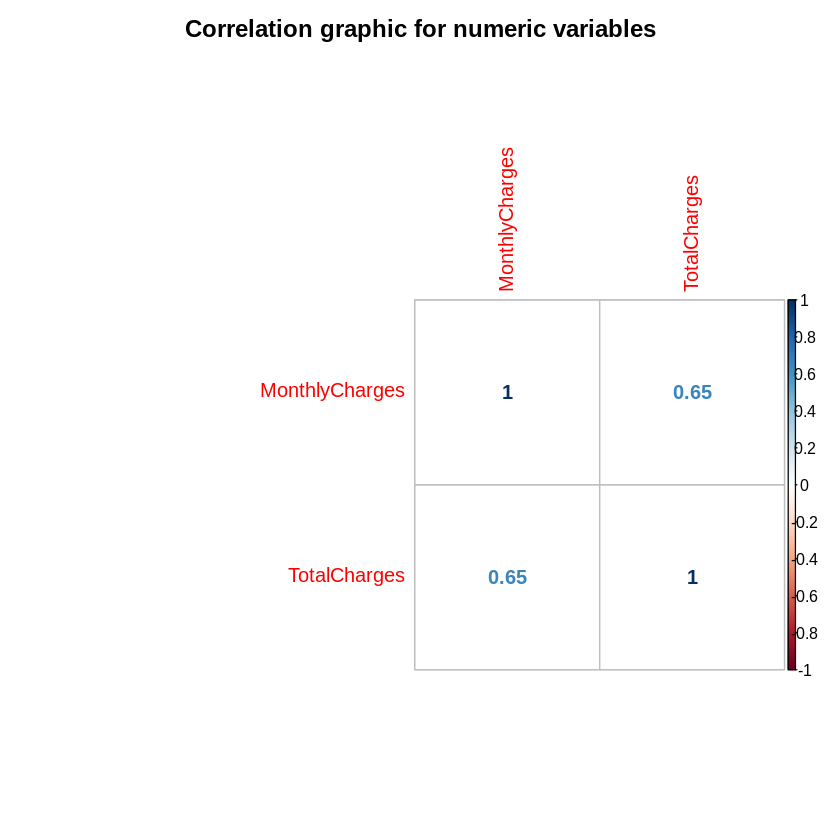

In [23]:
numeric.var = sapply(churn, is.numeric)
corr.matrix = cor(churn[, numeric.var])
corrplot(corr.matrix, main = "\n\nCorrelation graphic for numeric variables", method = "number")

#### MonthlyCharges and TotalCharges has a high colinearity, so we remove one of them

In [25]:
churn$TotalCharges = NULL

In [31]:
p1 = ggplot(churn, aes(x = gender)) +
     ggtitle("Gender") +
     xlab("Sex") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() +
     theme_minimal()

In [32]:
p2 = ggplot(churn, aes(x = SeniorCitizen)) +
     ggtitle("Senior Citizen") +
     xlab("Senior Citizen") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [33]:
p3 = ggplot(churn, aes(x = Partner)) +
     ggtitle("Partner") +
     xlab("Partner") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [40]:
p4 = ggplot(churn, aes(x = Dependents)) +
     ggtitle("Dependents") +
     xlab("Dependents") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

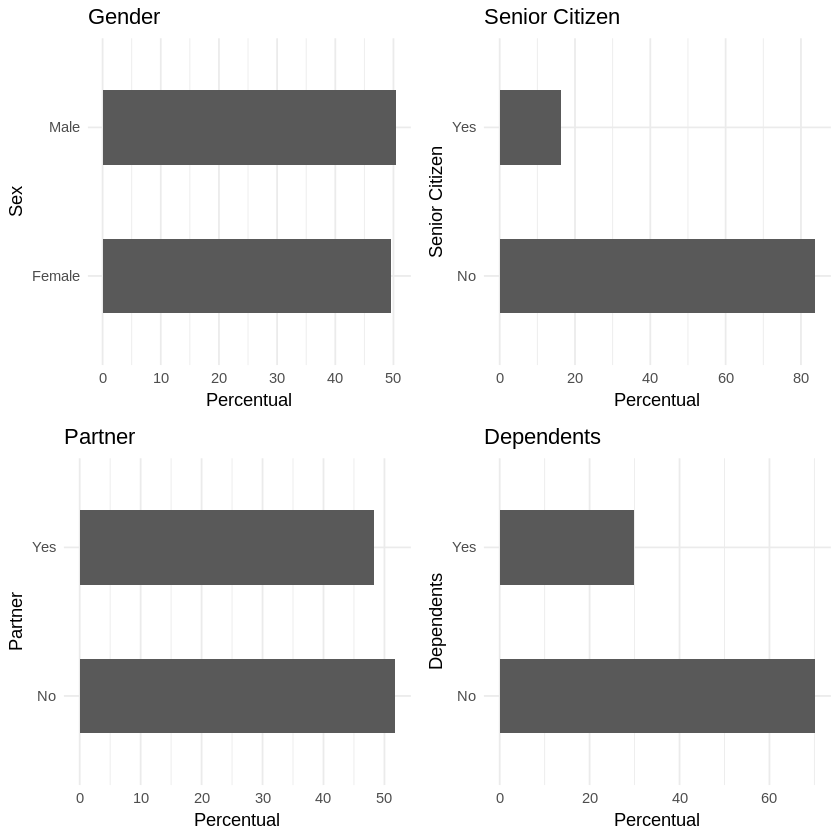

In [41]:
grid.arrange(p1, p2, p3, p4, ncol = 2)

In [35]:
p5 = ggplot(churn, aes(x = PhoneService)) +
     ggtitle("Phone Service") +
     xlab("Phone Service") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [36]:
p6 = ggplot(churn, aes(x = MultipleLines)) +
     ggtitle("Multiple Lines") +
     xlab("Multiple Lines") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [37]:
p7 = ggplot(churn, aes(x = InternetService)) +
     ggtitle("Internet Service") +
     xlab("Internet Service") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [42]:
p8 = ggplot(churn, aes(x = OnlineSecurity)) +
     ggtitle("Online Security") +
     xlab("Online Security") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

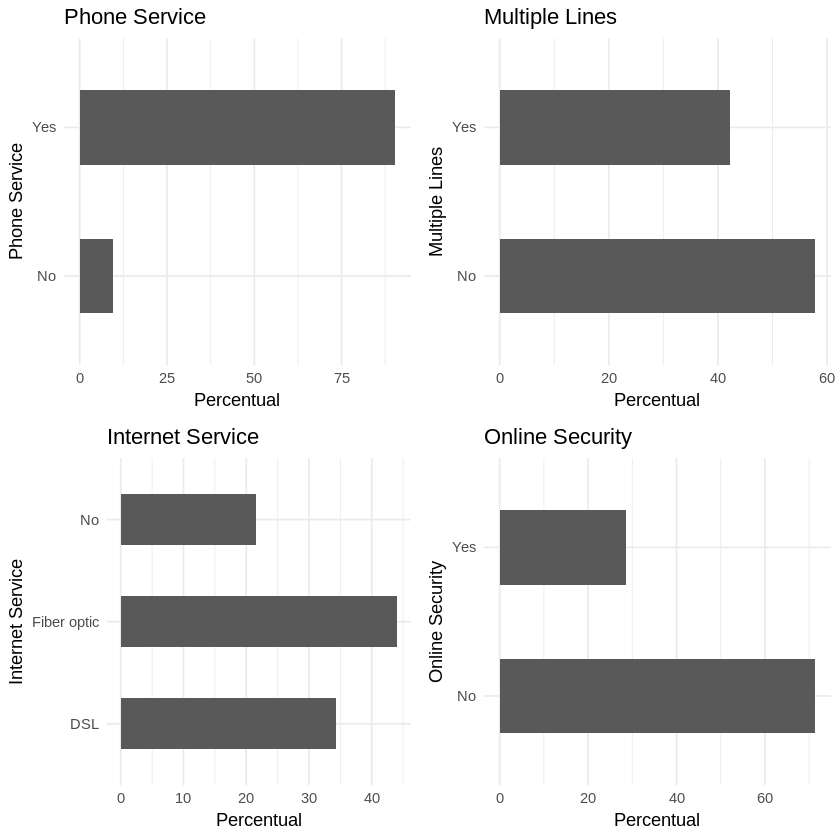

In [43]:
grid.arrange(p5, p6, p7, p8, ncol = 2)

In [44]:
p9 = ggplot(churn, aes(x = OnlineBackup)) +
     ggtitle("Online Backup") +
     xlab("Online Backup") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [45]:
p10 = ggplot(churn, aes(x = DeviceProtection)) +
     ggtitle("Device Protection") +
     xlab("Device Protection") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [46]:
p11 = ggplot(churn, aes(x = TechSupport)) +
     ggtitle("Tech Support") +
     xlab("Tech Support") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [47]:
p12 = ggplot(churn, aes(x = StreamingTV)) +
     ggtitle("Streaming TV") +
     xlab("Streaming TV") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

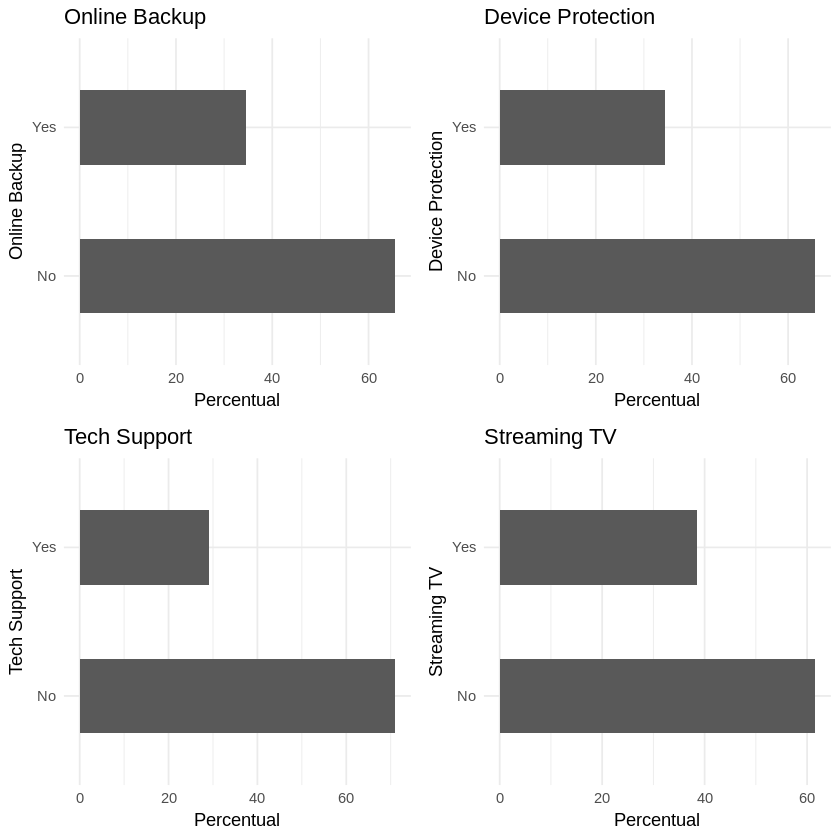

In [48]:
grid.arrange(p9, p10, p11, p12, ncol = 2)

In [49]:
p13 = ggplot(churn, aes(x = StreamingMovies)) +
     ggtitle("Streaming Movies") +
     xlab("Streaming Movies") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [50]:
p14 = ggplot(churn, aes(x = Contract)) +
     ggtitle("Contract") +
     xlab("Contract") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [51]:
p15 = ggplot(churn, aes(x = PaperlessBilling)) +
     ggtitle("Paperless Billing") +
     xlab("Paperless Billing") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [52]:
p16 = ggplot(churn, aes(x = PaymentMethod)) +
     ggtitle("Payment Method") +
     xlab("Payment Method") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

In [55]:
p17 = ggplot(churn, aes(x = tenure_group)) +
     ggtitle("Tenure Group") +
     xlab("Tenure Group") +
     geom_bar(aes(y = 100 * (..count..)/sum(..count..)), width = 0.5) +
     ylab("Percentual") +
     coord_flip() + 
     theme_minimal()

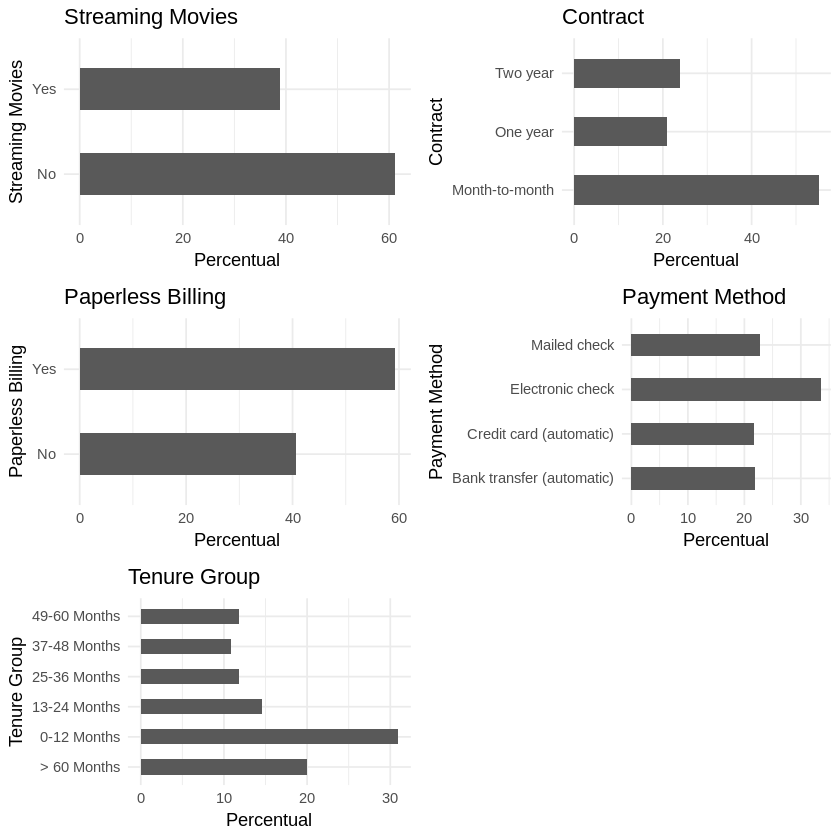

In [56]:
grid.arrange(p13, p14, p15, p16, p17, ncol = 2)

# Machine Learning
### Predictive model
#### Logistic Regression

In [59]:
# Test, train, split
intrain = createDataPartition(churn$Churn, p = 0.7, list = F)
set.seed(2017)
training = churn[intrain,]
testing = churn[-intrain,]

In [60]:
dim(training); dim(testing)

[1] 4924   19

[1] 2108   19

In [62]:
?glm

glm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
family,"a description of the error distribution and link function to be used in the model. For glm this can be a character string naming a family function, a family function or the result of a call to a family function. For glm.fit only the third option is supported. (See family for details of family functions.)"
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which glm is called."
weights,an optional vector of ‘prior weights’ to be used in the fitting process. Should be NULL or a numeric vector.
subset,an optional vector specifying a subset of observations to be used in the fitting process.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
start,starting values for the parameters in the linear predictor.
etastart,starting values for the linear predictor.
mustart,starting values for the vector of means.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector of length equal to the number of cases. One or more offset terms can be included in the formula instead or as well, and if more than one is specified their sum is used. See model.offset."


### Logistic Regression model training
#### Fitting

In [61]:
LogModel = glm(Churn ~ ., family = binomial(link = "logit"), data = training)
print(summary(LogModel))


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8886  -0.6667  -0.2949   0.6701   3.1337  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -2.124605   0.999775  -2.125 0.033580 *  
genderMale                           -0.046620   0.077708  -0.600 0.548548    
SeniorCitizenYes                      0.232030   0.100958   2.298 0.021545 *  
PartnerYes                           -0.078673   0.093003  -0.846 0.397595    
DependentsYes                        -0.101524   0.106531  -0.953 0.340592    
PhoneServiceYes                      -0.661670   0.787872  -0.840 0.401010    
MultipleLinesYes                      0.261926   0.214212   1.223 0.221426    
InternetServiceFiber optic            0.719759   0.969510   0.742 0.457849    
InternetServiceNo                    -0.642241   0.979164  -0.656 0.511884  

#### Variance analysis

In [63]:
?anova

anova {stats},R Documentation
object,"an object containing the results returned by a model fitting function (e.g., lm or glm)."
...,additional objects of the same type.


In [64]:
anova(LogModel, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,4923,5702.760,NA
gender,1,0.58521644,4922,5702.175,4.442749e-01
SeniorCitizen,1,117.72733991,4921,5584.447,1.989393e-27
Partner,1,131.85533383,4920,5452.592,1.609295e-30
Dependents,1,30.11601386,4919,5422.476,4.069568e-08
PhoneService,1,0.79030799,4918,5421.686,3.740070e-01
MultipleLines,1,6.95058036,4917,5414.735,8.379205e-03
InternetService,2,480.95578491,4915,4933.779,3.645678e-105
OnlineSecurity,1,182.11755248,4914,4751.662,1.671427e-41
OnlineBackup,1,60.20581585,4913,4691.456,8.543938e-15


In [65]:
testing$Churn = as.character(testing$Churn)
testing$Churn[testing$Churn == "No"] = 0
testing$Churn[testing$Churn == "Yes"] = 1
fitted.results = predict(LogModel, newdata = testing, type="response")
fitted.results = ifelse(fitted.results > 0.5, 1, 0)
misClassificError = mean(fitted.results != testing$Churn)
print(paste('Logistic Regression Accuracy', 1 - misClassificError))

[1] "Logistic Regression Accuracy 0.79696394686907"


In [67]:
print('Confusion Matrix')
table(testing$Churn, fitted.results > 0.5)

[1] "Confusion Matrix"


   
    FALSE TRUE
  0  1392  156
  1   272  288

In [68]:
print('Odds Ratio')
exp(cbind(OR=coef(LogModel), confint(LogModel)))

[1] "Odds Ratio"


Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),0.1194802,0.01679404,0.8465928
genderMale,0.9544500,0.81958752,1.1115080
SeniorCitizenYes,1.2611573,1.03453522,1.5369551
PartnerYes,0.9243417,0.77031679,1.1092721
DependentsYes,0.9034595,0.73271226,1.1126509
PhoneServiceYes,0.5159888,0.11004783,2.4167699
MultipleLinesYes,1.2994305,0.85399148,1.9780476
InternetServiceFiber optic,2.0539378,0.30735255,13.7595621
InternetServiceNo,0.5261123,0.07716532,3.5877762
OnlineSecurityYes,0.6208907,0.40512376,0.9500723
